In [1]:
import pandas as pd
import numpy as np

In [2]:
path = r"C:\python project\Pandas & Numpy course\Pandas+Course+Resources\Pandas Course Resources\project_data\project_transactions.csv"

cols = ["household_key","BASKET_ID", "DAY", "PRODUCT_ID", "QUANTITY", "SALES_VALUE"]

dtypes = {"DAY" : "Int16", "QUANTITY": "Int32", "PRODUCT_ID": "Int32"}

transactions = pd.read_csv(path,
                           dtype = dtypes,
                           usecols= cols)

In [3]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   household_key  1048575 non-null  int64  
 1   BASKET_ID      1048575 non-null  int64  
 2   DAY            1048575 non-null  Int16  
 3   PRODUCT_ID     1048575 non-null  Int32  
 4   QUANTITY       1048575 non-null  Int32  
 5   SALES_VALUE    1048575 non-null  float64
dtypes: Int16(1), Int32(2), float64(1), int64(2)
memory usage: 37.0 MB


In [4]:
transactions.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
count,1048575.0,1.048575e+06,1048575.0,1048575.0,1048575.0,1048575.0
mean,1052.0,3.017059e+10,222.0,2459151.0,95.0,3.0
std,604.0,1.547789e+09,97.0,3138076.0,1108.0,4.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0
25%,545.0,2.878861e+10,141.0,913785.0,1.0,1.0
50%,1038.0,3.021561e+10,225.0,1020682.0,1.0,2.0
75%,1578.0,3.153172e+10,306.0,1122358.0,1.0,3.0
max,2099.0,3.270491e+10,385.0,13986853.0,61335.0,840.0


In [5]:
transactions = (transactions
                .assign(date =
                        (pd.to_datetime("2016", format="%Y")
                         + pd.to_timedelta(transactions["DAY"].sub(1).astype(str)+"days"))

                ).drop(["DAY"], axis=1)
                )

In [6]:
transactions.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01


# Time Based Analysis

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_23992\3703530279.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


<Axes: xlabel='date'>

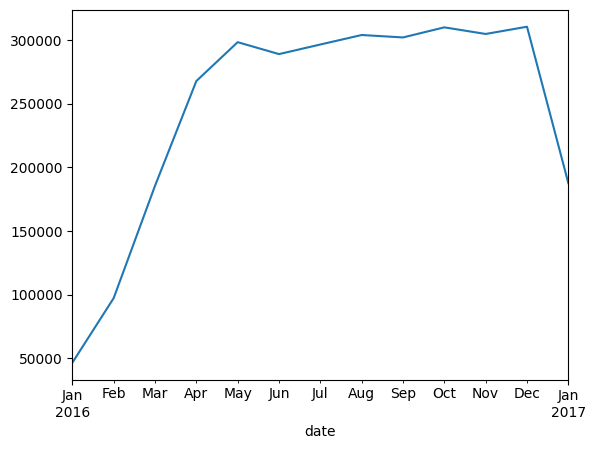

In [7]:
# Monthly sum for Sales

(transactions.set_index("date")
.loc[:, "SALES_VALUE"]
.resample("M")
.sum()
.plot()
)

<Axes: xlabel='date'>

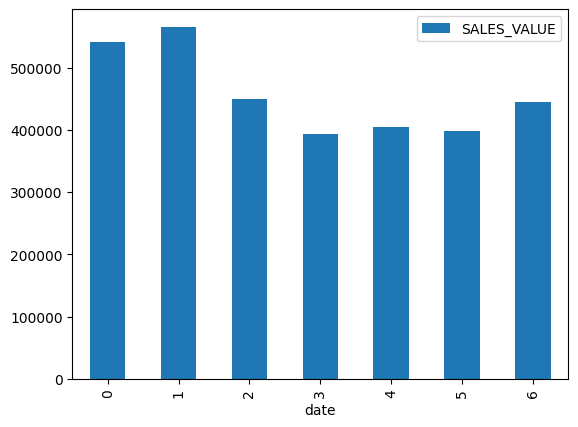

In [8]:
# Transactions by dayofweek, then calculated sum and ploted a bar chart

(transactions
 .groupby(transactions["date"].dt.dayofweek)
 .agg({"SALES_VALUE": "sum"})
 .plot.bar())

# Demographics

In [9]:
path = r"C:\python project\Pandas & Numpy course\Pandas+Course+Resources\Pandas Course Resources\project_data\hh_demographic.csv"

In [10]:
# Columns to include
dem_cols = ["AGE_DESC", "INCOME_DESC", "household_key", "HH_COMP_DESC"]

# convert the object columns to category dtype
dem_dtypes = {"AGE_DESC": "category", "INCOME_DESC": "category", "HH_COMP_DESC": "category"}




demographics = pd.read_csv(path,
                           usecols= dem_cols,
                          dtype = dem_dtypes)


demographics.head()

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16


In [11]:
# Create total sales by household dataframe

household_sales = (transactions
                   .groupby("household_key")
                   .agg({"SALES_VALUE": 'sum'}))

household_sales.head()

,SALES_VALUE
household_key,
1,2102.37
2,990.19
3,2071.00
4,990.18
5,505.59


In [12]:
# Join Household sales and demographics table on household_key (inner)

household_sales_demo = (household_sales.merge(demographics,
                        how= "inner",
                        left_on = "household_key",
                        right_on = "household_key",
                        ))

In [13]:
household_sales_demo.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   household_key  668 non-null    int64   
 1   SALES_VALUE    668 non-null    float64 
 2   AGE_DESC       668 non-null    category
 3   INCOME_DESC    668 non-null    category
 4   HH_COMP_DESC   668 non-null    category
dtypes: category(3), float64(1), int64(1)
memory usage: 14.5 KB


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_23992\3266133281.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["AGE_DESC"])


<Axes: xlabel='AGE_DESC'>

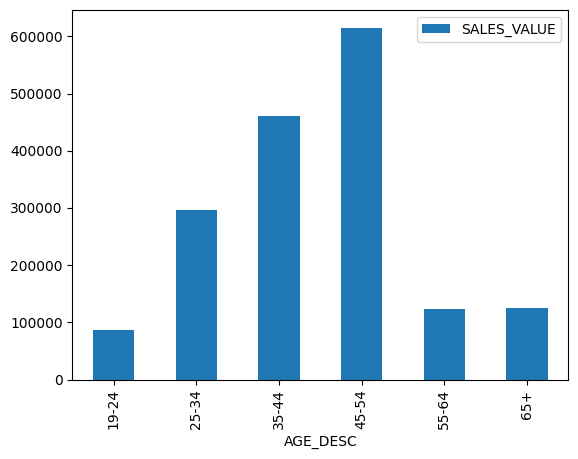

In [14]:
# Calculate sum of sales by age group
(household_sales_demo
 .groupby(["AGE_DESC"])
 .agg({"SALES_VALUE": 'sum'})
 .plot.bar())

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_23992\2048226691.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["INCOME_DESC"])


<Axes: xlabel='INCOME_DESC'>

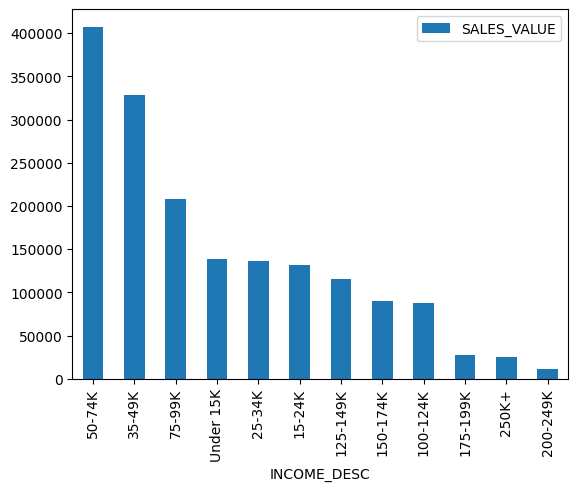

In [15]:
# calculate sum of sales by income, ordered by magnitude

(household_sales_demo
 .groupby(["INCOME_DESC"])
 .agg({"SALES_VALUE": "sum"})
 .sort_values("SALES_VALUE", ascending=False)
 .plot.bar()
 )

In [16]:
(household_sales_demo.pivot_table(index="AGE_DESC", 
                                  columns="HH_COMP_DESC",
                                  values="SALES_VALUE",
                                  aggfunc="mean",
                                  margins=True
                                  )
                                  .style.background_gradient(cmap="RdYlGn" , axis=None))

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_23992\1890624525.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  (household_sales_demo.pivot_table(index="AGE_DESC",


HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,4113.836667,2658.531250,2052.852000,1747.458889,740.245000,2606.005000,2226.209487
25-34,2388.663750,2699.154865,2672.430000,2236.540588,2345.456190,3326.630000,2531.236752
35-44,2703.048889,3231.918679,2785.024889,2776.930345,2438.597333,2028.030000,2841.750123
45-54,3149.770000,3025.478367,2746.146216,2133.882703,2057.625000,2217.853409,2563.261292
55-64,1281.930000,2215.990000,2690.621053,2399.899231,1973.655000,3741.100000,2478.218000
65+,1737.410000,2508.830000,2218.554643,1978.720588,1887.824000,1240.700000,2085.677000
All,2754.860714,2958.330385,2618.114000,2279.261475,2142.056375,2289.256349,2556.249431


In [17]:
del [household_sales_demo, household_sales]

# Product Demographics

In [18]:
product_cols = ["PRODUCT_ID", "DEPARTMENT"]
product_dtypes = {"PRODUCT_ID" : "Int32", "DEPARTMENT": "category"}


product = pd.read_csv(r"C:\python project\Pandas & Numpy course\Pandas+Course+Resources\Pandas Course Resources\project_data\product.csv",
                      usecols=product_cols,
                      dtype=product_dtypes)

In [20]:
# Join all 3 tables together with an inner join
# Join product on product_id (only shared column)

trans_demo_dept = (transactions
                   .merge(demographics,
                          how = "inner",
                          left_on='household_key',
                          right_on="household_key",)
                    .merge(product,
                          how = "inner",
                          left_on= "PRODUCT_ID",
                          right_on = "PRODUCT_ID"))

In [21]:
trans_demo_dept.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550888 entries, 0 to 550887
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   household_key  550888 non-null  int64         
 1   BASKET_ID      550888 non-null  int64         
 2   PRODUCT_ID     550888 non-null  Int32         
 3   QUANTITY       550888 non-null  Int32         
 4   SALES_VALUE    550888 non-null  float64       
 5   date           550888 non-null  datetime64[ns]
 6   AGE_DESC       550888 non-null  category      
 7   INCOME_DESC    550888 non-null  category      
 8   HH_COMP_DESC   550888 non-null  category      
 9   DEPARTMENT     550888 non-null  category      
dtypes: Int32(2), category(4), datetime64[ns](1), float64(1), int64(2)
memory usage: 24.2 MB


In [22]:
(trans_demo_dept.pivot_table(index="DEPARTMENT",
                             columns="AGE_DESC",
                             values="SALES_VALUE",
                             aggfunc="sum")
                             .style.background_gradient(cmap="RdYlGn", axis=1))

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_23992\1965200937.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  (trans_demo_dept.pivot_table(index="DEPARTMENT",


AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AUTOMOTIVE,11.640000,8.680000,25.130000,25.650000,0.000000,14.380000
CHARITABLE CONT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CHEF SHOPPE,35.900000,0.000000,19.940000,35.170000,3.490000,0.000000
CNTRL/STORE SUP,1.000000,0.000000,1.000000,0.000000,0.000000,0.100000
COSMETICS,360.730000,882.480000,1941.510000,2467.250000,461.460000,288.360000
COUP/STR & MFG,1.490000,18.110000,47.390000,63.010000,12.250000,2.990000
DAIRY DELI,3.800000,3.850000,7.390000,16.750000,3.140000,1.940000
DELI,1787.540000,7845.170000,16135.550000,20205.130000,4822.290000,5692.310000


In [23]:
(trans_demo_dept.pivot_table(index="DEPARTMENT",
                             columns="AGE_DESC",
                             values="SALES_VALUE",
                             aggfunc="sum")
                             .style.background_gradient(cmap="RdYlGn", axis=1)
                             .to_excel("Project_demographic_sales.xlsx", sheet_name="Sales_pivot"))

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_23992\1958224289.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  (trans_demo_dept.pivot_table(index="DEPARTMENT",
